Political Influence on Stock Market Performance Analysis

In [2]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------------------------- 949.2/949.2 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 9.2 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=89d2065c7863c4337ef930eafc4885b05158c2decf5f7704b20985a02e2a1525
  Stored in directory: c:\users\dijon\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab64

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [ ]:
!pip install --upgrade yfinance

In [2]:
# Option 1 for importing data
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-07-31')

sp500.to_csv('sp500.csv')

sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)
sp500df.tail()


C:\Users\Delyan\AppData\Local\Temp\ipykernel_21660\2083838495.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\Delyan\AppData\Local\Temp\ipykernel_21660\2083838495.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
2025-07-24,6363.35009765625,6381.31005859375,6360.56982421875,6368.60009765625,5282720000
2025-07-25,6388.64013671875,6395.81982421875,6368.52978515625,6370.009765625,4470720000
2025-07-28,6389.77001953125,6401.06982421875,6375.7900390625,6397.68994140625,4565620000
2025-07-29,6370.85986328125,6409.259765625,6363.919921875,6405.6201171875,5076120000
2025-07-30,6362.89990234375,6396.5400390625,6336.3798828125,6381.22998046875,5375070000


In [3]:
#Start after cleaning the csv file in excel
sp500df = pd.read_csv('sp500_clean.csv', parse_dates=True)
sp500df.head()


,Date,Close,High,Low,Open,Volume
0,12/30/1927,17.660000,17.660000,17.660000,17.660000,0
1,1/3/1928,17.760000,17.760000,17.760000,17.760000,0
2,1/4/1928,17.719999,17.719999,17.719999,17.719999,0
3,1/5/1928,17.549999,17.549999,17.549999,17.549999,0
4,1/6/1928,17.660000,17.660000,17.660000,17.660000,0


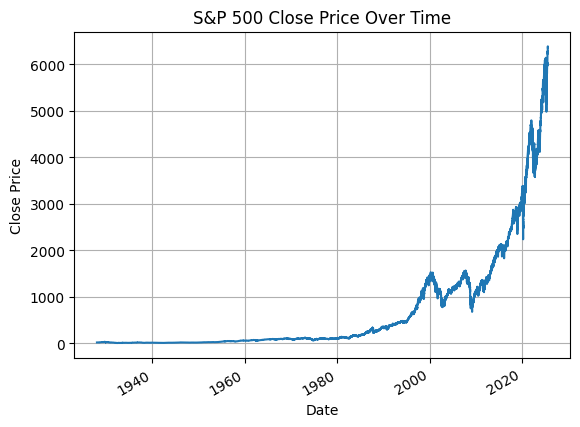

In [4]:
#A graph show
sp500df['Date'] = pd.to_datetime(sp500df['Date'])

# Set 'Date' as index
sp500df.set_index('Date', inplace=True)

# Convert 'Close' to numeric, in case it's still object type
sp500df['Close'] = pd.to_numeric(sp500df['Close'], errors='coerce')

sp500df['Close'].plot(title='S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#sp500df['Close'].plot()

In [ ]:
#Option 2 for importing data
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime

start = datetime(2024, 1, 10)
end = datetime(2025, 6, 1)

# Fetch data using yfinance
data = yf.download('^GSPC', start=start, end=end)

# Add dummy variable: 1 if Close > Open = 1, else 0
data[('dummy_var')] = (data[('Close', '^GSPC')] > data[('Open', '^GSPC')]).astype(int)
data

In [34]:
data['Low']

Ticker,^GSPC
Date,
2024-01-10,4756.200195
2024-01-11,4739.580078
2024-01-12,4768.979980
2024-01-16,4747.120117
2024-01-17,4714.819824
...,...
2025-05-23,5767.410156
2025-05-27,5854.069824
2025-05-28,5881.879883


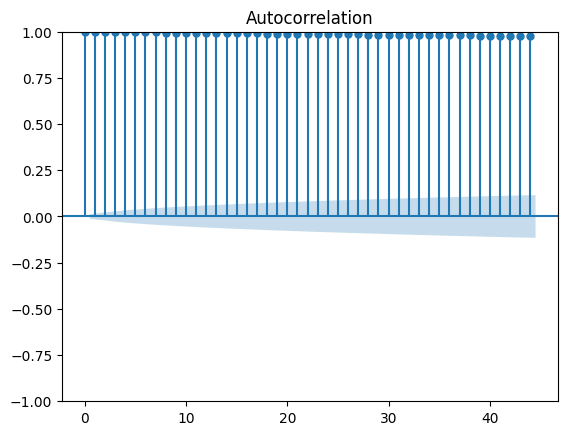

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#**************************
# Plot ACF for 'Close' column
plot_acf(sp500df['Close'])
plt.show()


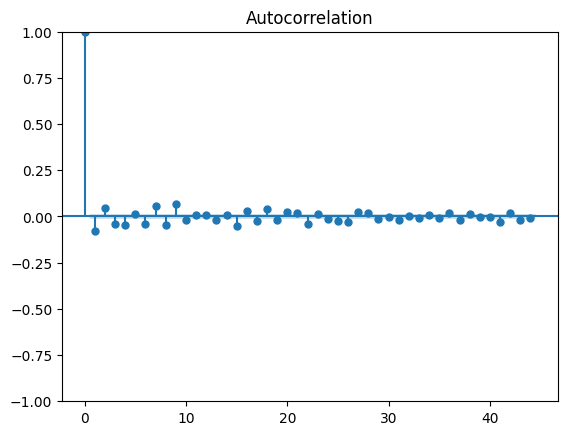

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# First difference
diff_close = sp500df['Close'].diff().dropna()

# Plot ACF of differenced series
plot_acf(diff_close)
plt.show()


In [24]:
#All incorporated in the final code (All working)
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters
auto_model = auto_arima(
    train, 
    seasonal=False, 
    stepwise=True, 
    suppress_warnings=True,
    trace=True,      # shows the search process
    error_action='ignore'
)

print(auto_model.summary())

# Fit ARIMA with the best parameters
arima_model = ARIMA(train, order=auto_model.order)
arima_model_fit = arima_model.fit()

# Forecast
arima_forecast = arima_model_fit.forecast(steps=len(test))


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59096.316, Time=13.12 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59130.832, Time=0.58 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59111.806, Time=0.97 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59109.641, Time=1.76 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59133.492, Time=0.56 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59094.212, Time=7.35 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=59096.201, Time=2.44 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59092.481, Time=4.06 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59098.493, Time=3.81 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=59096.589, Time=1.06 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=59097.357, Time=1.56 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 37.335 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7425
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -29542.241
Date:                Fri, 15 Aug 2025   AIC                          59092.481
Time:                        11:15:44   BIC                          59120.131
Sample:                    01-02-1990   HQIC                         59101.981
                         - 06-18-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0986      0.047      2.118      0.034       0.00

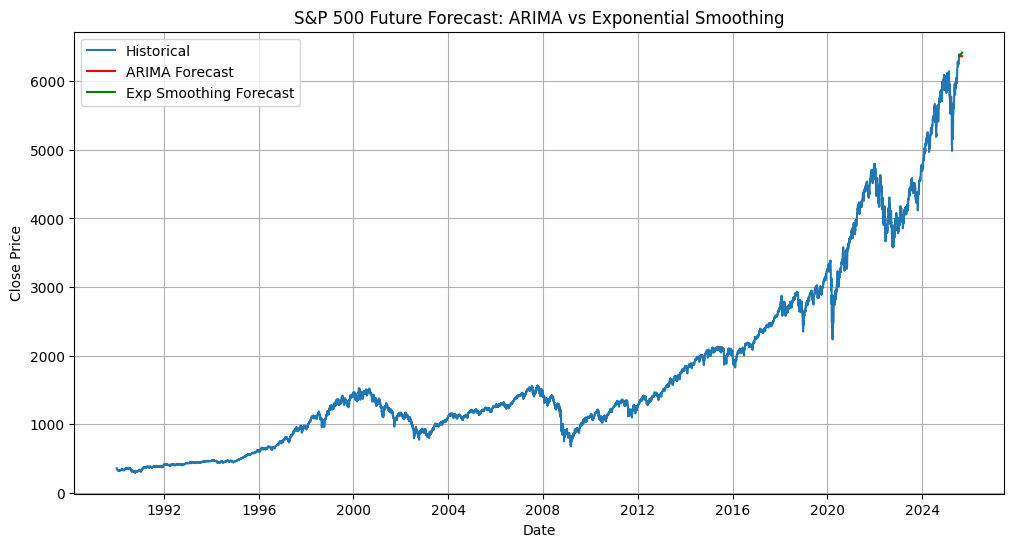

            ARIMA_Forecast  ExpSmoothing_Forecast
2025-07-31     6363.089905            6365.344542
2025-08-01     6363.010339            6366.999896
2025-08-04     6363.043659            6368.655250
2025-08-05     6363.029706            6370.310604
2025-08-06     6363.035549            6371.965959
2025-08-07     6363.033102            6373.621313
2025-08-08     6363.034126            6375.276667
2025-08-11     6363.033697            6376.932021
2025-08-12     6363.033877            6378.587375
2025-08-13     6363.033802            6380.242730
2025-08-14     6363.033833            6381.898084
2025-08-15     6363.033820            6383.553438
2025-08-18     6363.033826            6385.208792
2025-08-19     6363.033823            6386.864146
2025-08-20     6363.033824            6388.519501
2025-08-21     6363.033824            6390.174855
2025-08-22     6363.033824            6391.830209
2025-08-25     6363.033824            6393.485563
2025-08-26     6363.033824            6395.140918


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# --- Data prep ---
y = sp500df['Close'].asfreq('B').ffill()

# --- Forecast horizon ---
forecast_horizon = 30  # next 30 business days

# --- ARIMA on full dataset ---
arima_model = ARIMA(y, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=forecast_horizon)

# --- Exponential Smoothing on full dataset ---
es_model = ExponentialSmoothing(y, trend='add', seasonal=None)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=forecast_horizon)

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(y, label='Historical')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(es_forecast.index, es_forecast, label='Exp Smoothing Forecast', color='green')
plt.title('S&P 500 Future Forecast: ARIMA vs Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# --- Print forecast numbers ---
forecast_df = pd.DataFrame({
    'ARIMA_Forecast': arima_forecast,
    'ExpSmoothing_Forecast': es_forecast
})
print(forecast_df)


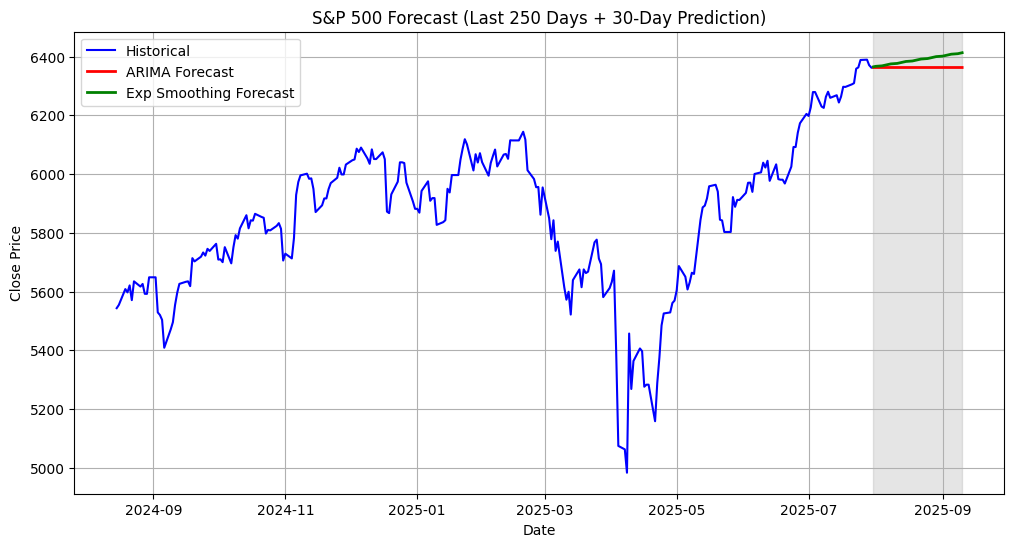

In [26]:
# Zoom in on recent data
zoom_period = 250  # days
y_recent = y[-zoom_period:]

plt.figure(figsize=(12, 6))
plt.plot(y_recent, label='Historical', color='blue')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='red', linewidth=2)
plt.plot(es_forecast.index, es_forecast, label='Exp Smoothing Forecast', color='green', linewidth=2)

# Shade forecast area
plt.axvspan(arima_forecast.index[0], arima_forecast.index[-1], color='gray', alpha=0.2)

plt.title(f'S&P 500 Forecast (Last {zoom_period} Days + {forecast_horizon}-Day Prediction)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# ===== LOAD DATA =====
sp500df = pd.read_csv("sp500_clean.csv")
sp500df['Date'] = pd.to_datetime(sp500df['Date'])
sp500df.set_index('Date', inplace=True)
sp500df['Close'] = pd.to_numeric(sp500df['Close'], errors='coerce')
sp500df = sp500df.dropna()

# ===== TRAIN-TEST SPLIT =====
train_size = int(len(sp500df) * 0.9)
train = sp500df['Close'][:train_size]
test = sp500df['Close'][train_size:]

# ===== LOG TRANSFORMATION =====
train_log = np.log(train)

# ===== AUTO ARIMA MODEL =====
auto_model = auto_arima(
    train_log,
    seasonal=True,
    m=252,  # yearly seasonality for trading days
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    stepwise=True,
    suppress_warnings=True,
    trace=True
)
print(auto_model.summary())

# Fit the model
arima_model_fit = auto_model.fit(train_log)

# ===== FORECAST =====
forecast_log = arima_model_fit.predict(n_periods=len(test))
forecast_arima = np.exp(forecast_log)  # back to original scale

# ===== EXPONENTIAL SMOOTHING FOR COMPARISON =====
exp_model = ExponentialSmoothing(train, trend='add', seasonal=None)
exp_fit = exp_model.fit()
forecast_exp = exp_fit.forecast(len(test))

# ===== PLOT =====
plt.figure(figsize=(14,7))
plt.plot(train.index, train, label="Historical", color="blue")
plt.plot(test.index, forecast_arima, label="ARIMA Forecast", color="red")
plt.plot(test.index, forecast_exp, label="Exp Smoothing Forecast", color="green")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("S&P 500 Forecast: Auto ARIMA (log) vs Exponential Smoothing")
plt.legend()
plt.grid(True)
plt.show()

# ===== PRINT FORECAST NUMBERS =====
forecast_df = pd.DataFrame({
    "Date": test.index,
    "Actual": test.values,
    "ARIMA_Prediction": forecast_arima,
    "Exp_Smoothing_Prediction": forecast_exp
})
print(forecast_df)


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[252] intercept   : AIC=-49254.059, Time=1.39 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MemoryError: Unable to allocate 3.88 GiB for an array with shape (254, 254, 8065) and data type float64

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Linear Regression (log + recent) -> MSE: 11806.70, MAE: 78.49
Exponential Smoothing -> MSE: 66418.07, MAE: 237.86
ARIMA (auto) -> MSE: 222359.43, MAE: 426.05


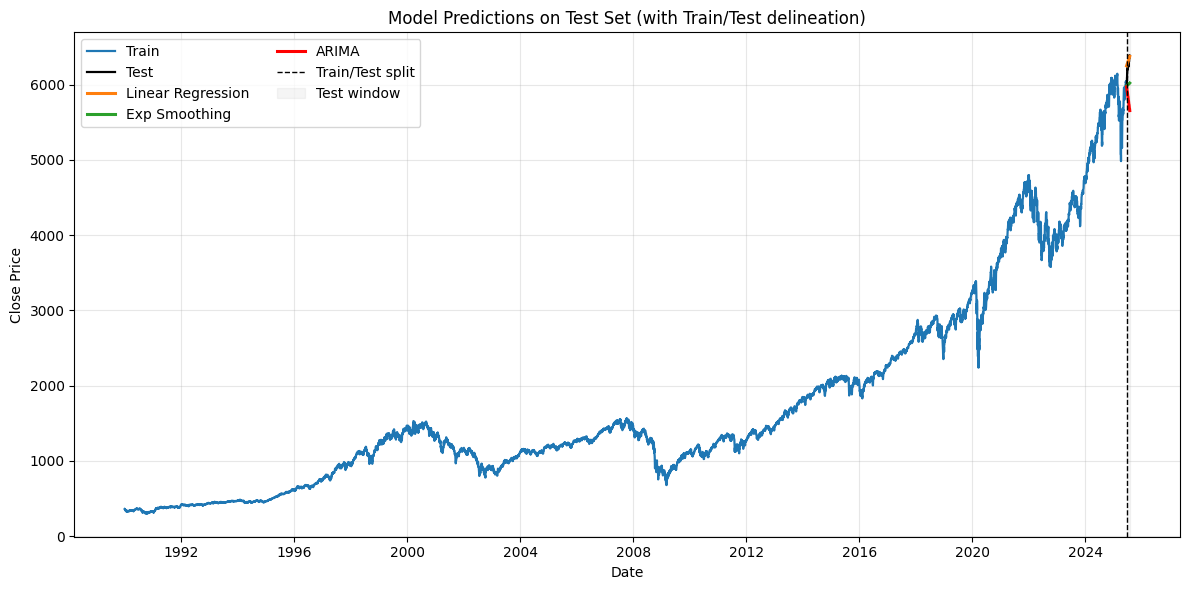

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

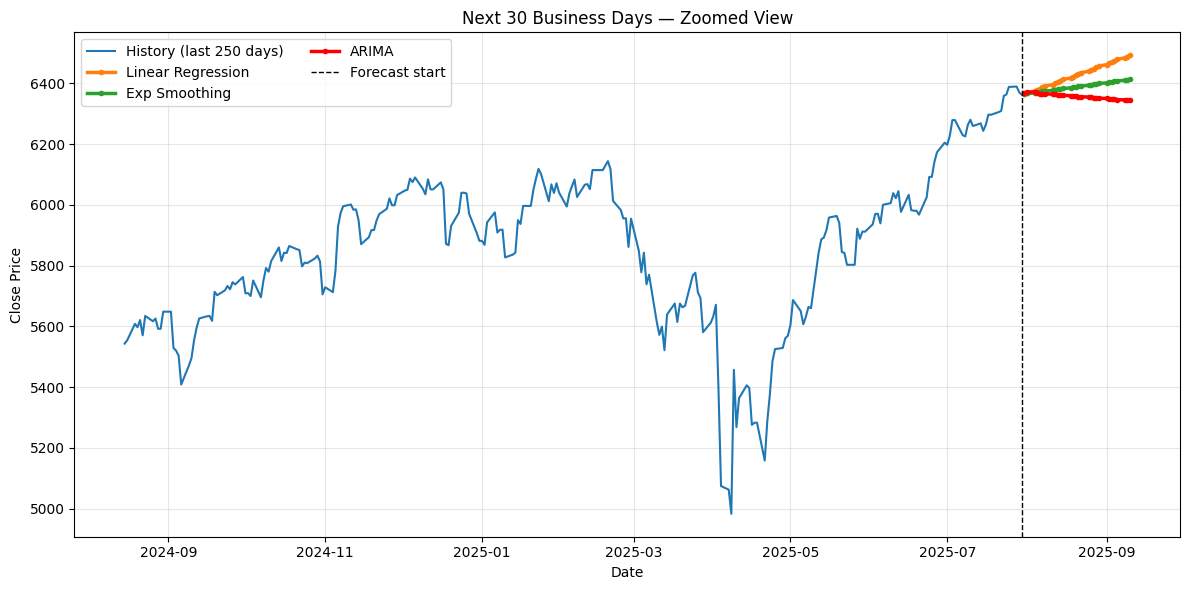

            LinearRegression_Forecast  ExpSmoothing_Forecast  ARIMA_Forecast
2025-07-31                6365.464459            6365.344542     6369.125681
2025-08-01                6369.813976            6366.999896     6371.061323
2025-08-04                6374.166466            6368.655250     6372.302634
2025-08-05                6378.521929            6370.310604     6368.899758
2025-08-06                6382.880369            6371.965959     6365.837261
2025-08-07                6387.241786            6373.621313     6365.374492
2025-08-08                6391.606184            6375.276667     6365.506084
2025-08-11                6395.973564            6376.932021     6364.941237
2025-08-12                6400.343928            6378.587375     6363.834252
2025-08-13                6404.717279            6380.242730     6362.429257
2025-08-14                6409.093618            6381.898084     6361.427940
2025-08-15                6413.472947            6383.553438     6360.688611

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# --- Data prep ---
y = sp500df['Close'].asfreq('B').ffill()

# --- Train/test split for evaluation ---
test_size = 30
train = y.iloc[:-test_size]
test = y.iloc[-test_size:]

# -------------------------
# LINEAR REGRESSION (log + recent window)
# -------------------------
recent_n = 500
y_recent_train = train.tail(recent_n)
X_train_lr = np.arange(len(y_recent_train)).reshape(-1, 1)
X_test_lr = np.arange(len(y_recent_train), len(y_recent_train) + len(test)).reshape(-1, 1)

lin_model = LinearRegression()
lin_model.fit(X_train_lr, np.log(y_recent_train))
lin_pred = np.exp(lin_model.predict(X_test_lr))
lin_pred = pd.Series(lin_pred, index=test.index)

# -------------------------
# EXPONENTIAL SMOOTHING
# -------------------------
es_model = ExponentialSmoothing(train, trend='add', seasonal=None)
es_fit = es_model.fit()
es_pred = es_fit.forecast(len(test))

# -------------------------
# ARIMA (auto_arima)
# -------------------------
arima_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
arima_pred = pd.Series(arima_model.predict(n_periods=len(test)), index=test.index)

# --- Evaluation ---
def evaluate(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}")

evaluate(test, lin_pred, "Linear Regression (log + recent)")
evaluate(test, es_pred, "Exponential Smoothing")
evaluate(test, arima_pred, "ARIMA (auto)")

# --- Plot test period ---
# --- Clear, labeled train/test split on the evaluation plot ---
split_date = test.index[0]

plt.figure(figsize=(12, 6))
# history split into two lines
plt.plot(train.index, train, label='Train', linewidth=1.6)
plt.plot(test.index, test, label='Test', linewidth=1.6, color='black')

# model predictions on the test window
plt.plot(lin_pred.index, lin_pred, label='Linear Regression', linewidth=2.2)
plt.plot(es_pred.index, es_pred, label='Exp Smoothing', linewidth=2.2)
plt.plot(arima_pred.index, arima_pred, label='ARIMA', linewidth=2.2, color='red')

# visual cue for the split + optional shading over test
plt.axvline(split_date, linestyle='--', color='k', linewidth=1, label='Train/Test split')
plt.axvspan(split_date, test.index[-1], color='grey', alpha=0.08, label='Test window')

plt.title('Model Predictions on Test Set (with Train/Test delineation)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, ncol=2)
plt.tight_layout()
plt.show()


# ==========================
# FINAL 30-DAY FORECAST
# ==========================
forecast_horizon = 30

# Linear Regression forecast
y_recent_full = y.tail(recent_n)
X_full_lr = np.arange(len(y_recent_full)).reshape(-1, 1)
X_future_lr = np.arange(len(y_recent_full), len(y_recent_full) + forecast_horizon).reshape(-1, 1)
lin_model.fit(X_full_lr, np.log(y_recent_full))
lin_forecast = np.exp(lin_model.predict(X_future_lr))
lin_forecast = pd.Series(lin_forecast,
                         index=pd.date_range(y.index[-1] + pd.tseries.offsets.BDay(),
                                             periods=forecast_horizon, freq='B'))

# Exponential Smoothing forecast
es_full_model = ExponentialSmoothing(y, trend='add', seasonal=None)
es_full_fit = es_full_model.fit()
es_forecast = es_full_fit.forecast(steps=forecast_horizon)

# ARIMA forecast
arima_full_model = auto_arima(y, seasonal=False, stepwise=True, suppress_warnings=True)
arima_forecast_vals = arima_full_model.predict(n_periods=forecast_horizon)
arima_forecast = pd.Series(arima_forecast_vals,
                           index=pd.date_range(y.index[-1] + pd.tseries.offsets.BDay(),
                                               periods=forecast_horizon, freq='B'))

# Zoomed plot
tail_n = 250
hist_tail = y.tail(tail_n)

plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (last 250 days)', linewidth=1.5)

plt.plot(lin_forecast.index, lin_forecast, label='Linear Regression', linewidth=2.5, marker='o', ms=3)
plt.plot(es_forecast.index, es_forecast, label='Exp Smoothing', linewidth=2.5, marker='o', ms=3)
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA', linewidth=2.5, marker='o', ms=3, color='red')

plt.axvline(y.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

plt.title('Next 30 Business Days — Zoomed View')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()

# Forecast table
forecast_df = pd.DataFrame({
    'LinearRegression_Forecast': lin_forecast,
    'ExpSmoothing_Forecast': es_forecast,
    'ARIMA_Forecast': arima_forecast
})
print(forecast_df)


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Linear Regression (log + recent) -> MSE: 11806.70, MAE: 78.49
Exponential Smoothing -> MSE: 66418.07, MAE: 237.86
ARIMA (auto) -> MSE: 222359.43, MAE: 426.05


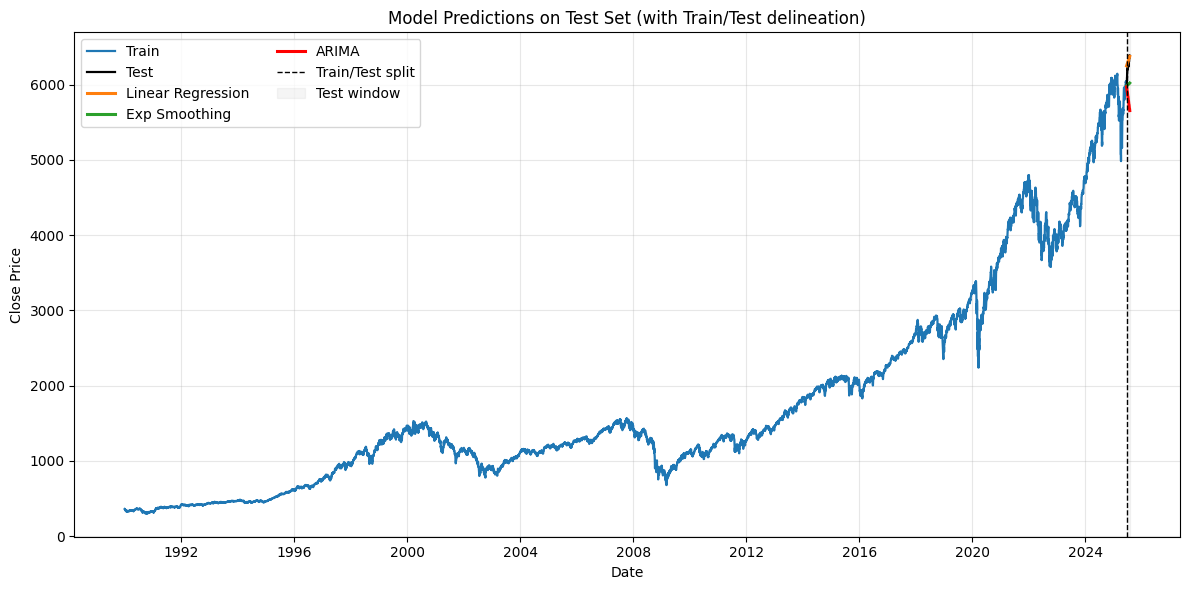

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

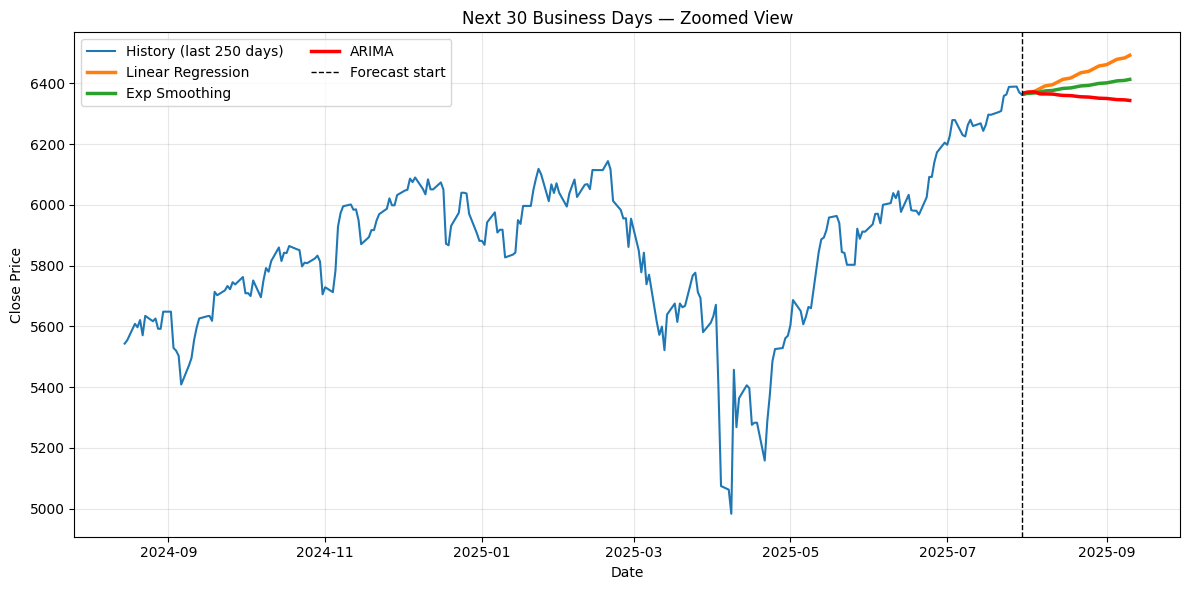

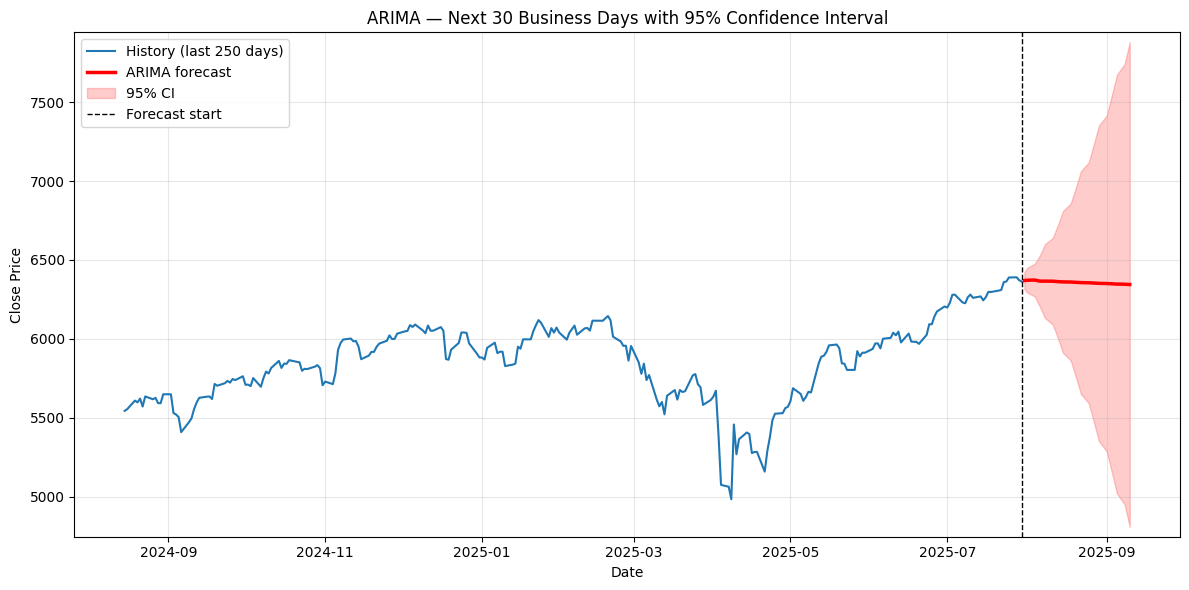

            LinearRegression_Forecast  ExpSmoothing_Forecast  ARIMA_Forecast  \
2025-07-31                6365.464459            6365.344542     6369.125681   
2025-08-01                6369.813976            6366.999896     6371.061323   
2025-08-04                6374.166466            6368.655250     6372.302634   
2025-08-05                6378.521929            6370.310604     6368.899758   
2025-08-06                6382.880369            6371.965959     6365.837261   
2025-08-07                6387.241786            6373.621313     6365.374492   
2025-08-08                6391.606184            6375.276667     6365.506084   
2025-08-11                6395.973564            6376.932021     6364.941237   
2025-08-12                6400.343928            6378.587375     6363.834252   
2025-08-13                6404.717279            6380.242730     6362.429257   
2025-08-14                6409.093618            6381.898084     6361.427940   
2025-08-15                6413.472947   

In [41]:
# pip install pmdarima statsmodels scikit-learn matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# ==========================
# 0) Data prep
# ==========================
# sp500df with a DatetimeIndex and column 'Close'. Already satisfied
y = sp500df['Close'].asfreq('B').ffill()

# ==========================
# 1) Train/Test split
# ==========================
test_size = 30  # last 30 business days
train = y.iloc[:-test_size]
test = y.iloc[-test_size:]
split_date = test.index[0]

# ==========================
# 2) Models on TRAIN -> predict TEST
# ==========================

# ---- Linear Regression (log + recent window) ----
recent_n = 500  # ~2 years of business days; adjust as you like
y_recent_train = train.tail(recent_n)
X_train_lr = np.arange(len(y_recent_train)).reshape(-1, 1)
X_test_lr = np.arange(len(y_recent_train), len(y_recent_train) + len(test)).reshape(-1, 1)

lin_model = LinearRegression()
lin_model.fit(X_train_lr, np.log(y_recent_train))
lin_pred = np.exp(lin_model.predict(X_test_lr))
lin_pred = pd.Series(lin_pred, index=test.index)

# ---- Exponential Smoothing ----
es_model = ExponentialSmoothing(train, trend='add', seasonal=None)
es_fit = es_model.fit()
es_pred = es_fit.forecast(len(test))

# ---- ARIMA (auto_arima) ----
arima_model = auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)
arima_pred = pd.Series(arima_model.predict(n_periods=len(test)), index=test.index)

# ==========================
# 3) Evaluation on TEST
# ==========================
def evaluate(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} -> MSE: {mse:.2f}, MAE: {mae:.2f}")

evaluate(test, lin_pred, "Linear Regression (log + recent)")
evaluate(test, es_pred, "Exponential Smoothing")
evaluate(test, arima_pred, "ARIMA (auto)")

# --- Clear, labeled train/test evaluation plot ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', linewidth=1.6, color='green')
plt.plot(test.index, test, label='Test', linewidth=1.6, color='black')

plt.plot(lin_pred.index, lin_pred, label='Linear Regression', linewidth=2.2)
plt.plot(es_pred.index, es_pred, label='Exp Smoothing', linewidth=2.2)
plt.plot(arima_pred.index, arima_pred, label='ARIMA', linewidth=2.2, color='red')

plt.axvline(split_date, linestyle='--', color='k', linewidth=1, label='Train/Test split')
plt.axvspan(split_date, test.index[-1], color='grey', alpha=0.08, label='Test window')

plt.title('Model Predictions on Test Set (with Train/Test delineation)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, ncol=2)
plt.tight_layout()
plt.show()

# ==========================
# 4) Refit on FULL data -> 30-day forecasts
# ==========================
forecast_horizon = 30
future_idx = pd.date_range(y.index[-1] + pd.tseries.offsets.BDay(),
                           periods=forecast_horizon, freq='B')

# ---- Linear Regression forecast (log + recent window) ----
y_recent_full = y.tail(recent_n)
X_full_lr = np.arange(len(y_recent_full)).reshape(-1, 1)
X_future_lr = np.arange(len(y_recent_full), len(y_recent_full) + forecast_horizon).reshape(-1, 1)
lin_model.fit(X_full_lr, np.log(y_recent_full))
lin_fc = pd.Series(np.exp(lin_model.predict(X_future_lr)), index=future_idx)

# ---- Exponential Smoothing forecast ----
es_full_model = ExponentialSmoothing(y, trend='add', seasonal=None)
es_full_fit = es_full_model.fit()
es_fc = es_full_fit.forecast(steps=forecast_horizon)
es_fc.index = future_idx  # ensure same index

# ---- ARIMA forecast + 95% CI ----
arima_full_model = auto_arima(
    y,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore'
)
arima_mean, arima_ci = arima_full_model.predict(
    n_periods=forecast_horizon, return_conf_int=True, alpha=0.05
)
arima_fc = pd.Series(arima_mean, index=future_idx)
arima_lower = pd.Series(arima_ci[:, 0], index=future_idx)
arima_upper = pd.Series(arima_ci[:, 1], index=future_idx)

# ==========================
# 5) Plots
# ==========================

# (A) Optional combined zoomed forecast (no CIs, just lines)
tail_n = 250
hist_tail = y.tail(tail_n)
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (last 250 days)', linewidth=1.5)
plt.plot(lin_fc.index, lin_fc, label='Linear Regression', linewidth=2.5)
plt.plot(es_fc.index, es_fc, label='Exp Smoothing', linewidth=2.5)
plt.plot(arima_fc.index, arima_fc, label='ARIMA', linewidth=2.5, color='red')
plt.axvline(y.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')
plt.title('Next 30 Business Days — Zoomed View')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()

# (B) ARIMA-only forecast with 95% confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (last 250 days)', linewidth=1.5)
plt.plot(arima_fc.index, arima_fc, label='ARIMA forecast', linewidth=2.5, color='red')
plt.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.2, label='95% CI', color='red')
plt.axvline(y.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

# nice y-limits for the window
ymin = pd.concat([hist_tail, arima_lower, arima_upper]).min()
ymax = pd.concat([hist_tail, arima_lower, arima_upper]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('ARIMA — Next 30 Business Days with 95% Confidence Interval')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

# ==========================
# 6) Forecast table
# ==========================
forecast_df = pd.DataFrame({
    'LinearRegression_Forecast': lin_fc,
    'ExpSmoothing_Forecast': es_fc,
    'ARIMA_Forecast': arima_fc,
    'ARIMA_Lower95': arima_lower,
    'ARIMA_Upper95': arima_upper
})
print(forecast_df)


Train: 2024-03-14 → 2025-04-21  (288 pts)
Test : 2025-04-22 → 2025-07-30   (72 pts)


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Linear Regression (log + recent) -> MAE: 179.51, RMSE: 227.94
Exponential Smoothing -> MAE: 819.71, RMSE: 861.85
ARIMA (auto) -> MAE: 830.79, RMSE: 873.11


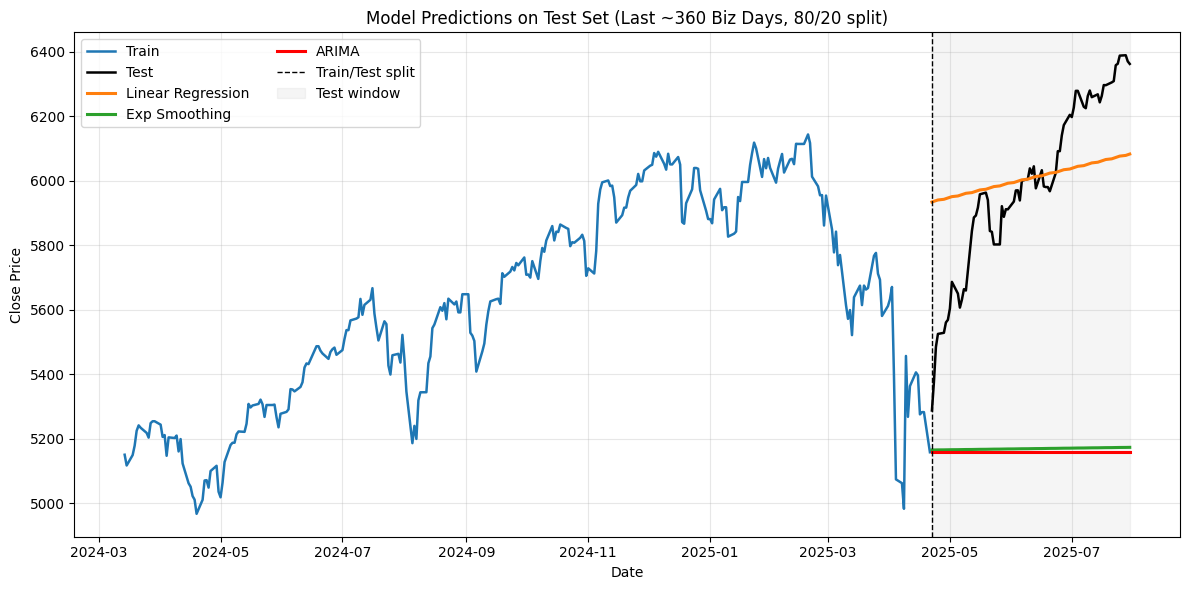

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

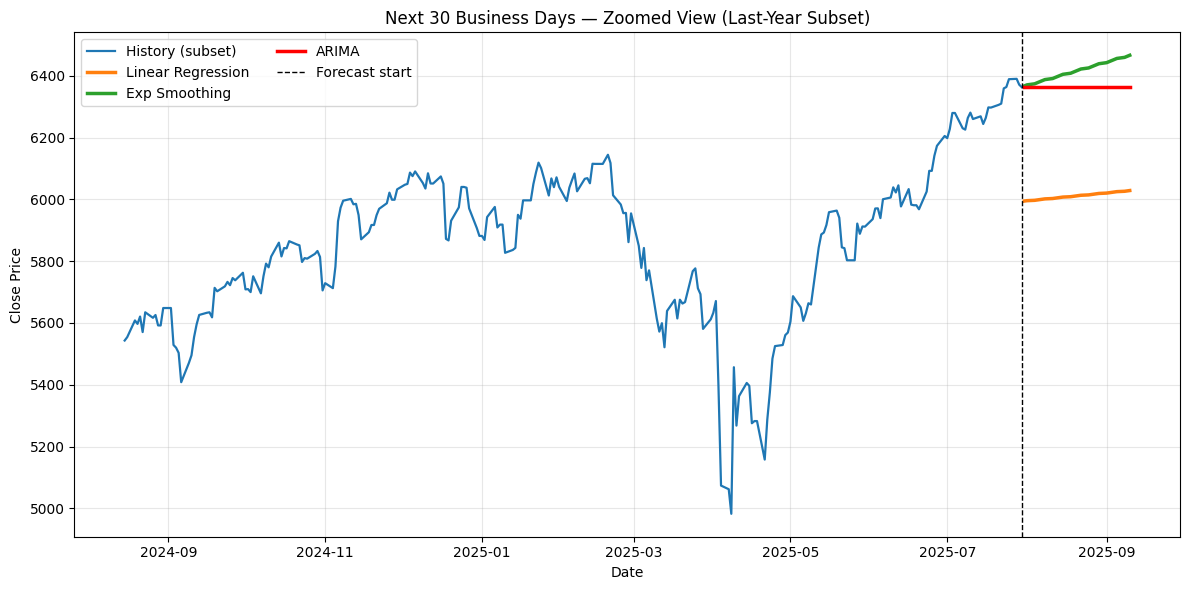

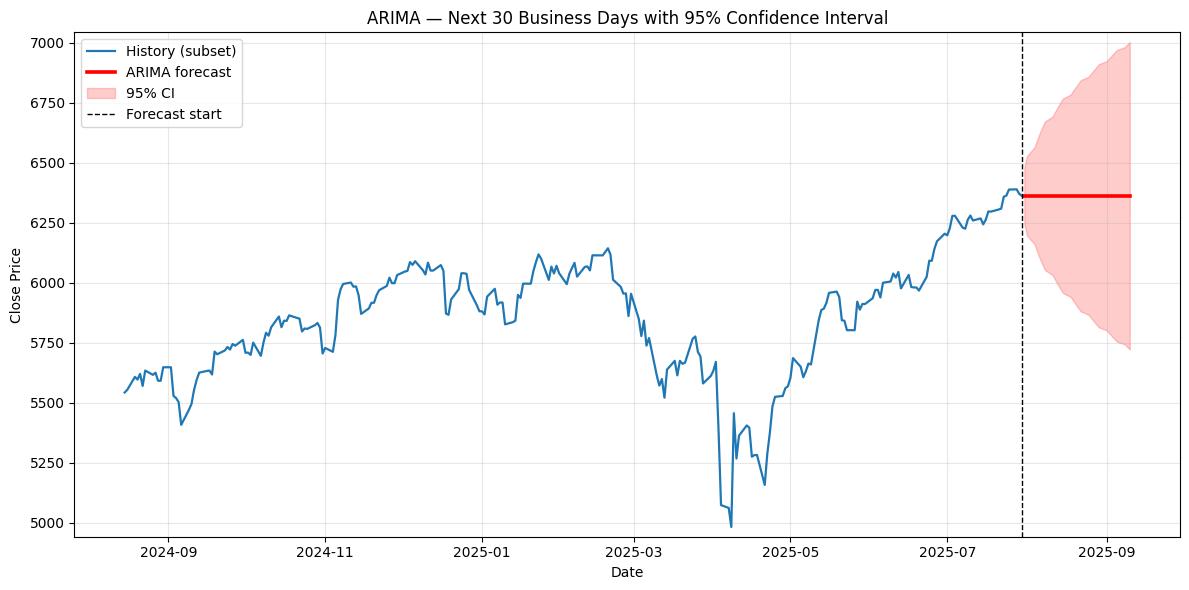

            LinearRegression_Forecast  ExpSmoothing_Forecast  ARIMA_Forecast  \
2025-07-31                5994.457027            6366.801708     6362.899902   
2025-08-01                5995.624566            6370.224243     6362.899902   
2025-08-04                5996.792333            6373.646777     6362.899902   
2025-08-05                5997.960327            6377.069311     6362.899902   
2025-08-06                5999.128548            6380.491845     6362.899902   
2025-08-07                6000.296997            6383.914380     6362.899902   
2025-08-08                6001.465674            6387.336914     6362.899902   
2025-08-11                6002.634578            6390.759448     6362.899902   
2025-08-12                6003.803709            6394.181982     6362.899902   
2025-08-13                6004.973069            6397.604517     6362.899902   
2025-08-14                6006.142656            6401.027051     6362.899902   
2025-08-15                6007.312471   

In [44]:
# All good ARIMA not working

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# ==========================
# 0) Data prep (expects sp500df with DatetimeIndex + 'Close')
# ==========================
y = sp500df['Close'].asfreq('B').ffill()

# ==========================
# 1) Last ~360 business days, then 80/20 split
# ==========================
last_n = 360
y_recent = y.tail(last_n)

split_idx = int(len(y_recent) * 0.8)  # 80%
train = y_recent.iloc[:split_idx]
test  = y_recent.iloc[split_idx:]
split_date = test.index[0]

print(f"Train: {train.index[0].date()} → {train.index[-1].date()}  ({len(train)} pts)")
print(f"Test : {test.index[0].date()} → {test.index[-1].date()}   ({len(test)} pts)")

# ==========================
# 2) Fit on TRAIN -> predict TEST
# ==========================

# ---- Linear Regression (log + recent window within TRAIN) ----
# keep this <= length of train
recent_n_lr = min(250, len(train))  # ~1Y trading days ~ 250
y_recent_train = train.tail(recent_n_lr)
X_train_lr = np.arange(len(y_recent_train)).reshape(-1, 1)
X_test_lr  = np.arange(len(y_recent_train), len(y_recent_train) + len(test)).reshape(-1, 1)

lin_model = LinearRegression()
lin_model.fit(X_train_lr, np.log(y_recent_train))
lin_pred = np.exp(lin_model.predict(X_test_lr))
lin_pred = pd.Series(lin_pred, index=test.index)

# ---- Exponential Smoothing ----
es_fit = ExponentialSmoothing(train, trend='add', seasonal=None).fit()
es_pred = es_fit.forecast(len(test))
es_pred.index = test.index

# ---- ARIMA (auto_arima) ----
arima_full_model = auto_arima(
    y_recent,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    with_intercept=True,   # allows drift
    trend='t'              # 't' = trend/drift term
)

arima_pred = pd.Series(arima_model.predict(n_periods=len(test)), index=test.index)

# ==========================
# 3) Evaluation on TEST
# ==========================
def evaluate(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {np.sqrt(mse):.2f}")

evaluate(test, lin_pred, "Linear Regression (log + recent)")
evaluate(test, es_pred, "Exponential Smoothing")
evaluate(test, arima_pred, "ARIMA (auto)")

# --- Clear train/test plot with predictions ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', linewidth=1.8)
plt.plot(test.index, test, label='Test', linewidth=1.8, color='black')

plt.plot(lin_pred.index, lin_pred, label='Linear Regression', linewidth=2.2)
plt.plot(es_pred.index, es_pred, label='Exp Smoothing', linewidth=2.2)
plt.plot(arima_pred.index, arima_pred, label='ARIMA', linewidth=2.2, color='red')

plt.axvline(split_date, linestyle='--', color='k', linewidth=1, label='Train/Test split')
plt.axvspan(split_date, test.index[-1], color='grey', alpha=0.08, label='Test window')

plt.title('Model Predictions on Test Set (Last ~360 Biz Days, 80/20 split)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, ncol=2)
plt.tight_layout()
plt.show()

# ==========================
# 4) Refit on FULL last-year subset -> forecast next 30 biz days
# ==========================
forecast_horizon = 30
future_idx = pd.date_range(y_recent.index[-1] + pd.tseries.offsets.BDay(),
                           periods=forecast_horizon, freq='B')

# Linear Regression forecast (log + recent window inside full subset)
y_recent_full = y_recent.tail(recent_n_lr)  # keep same window length
X_full_lr    = np.arange(len(y_recent_full)).reshape(-1, 1)
X_future_lr  = np.arange(len(y_recent_full), len(y_recent_full) + forecast_horizon).reshape(-1, 1)
lin_model.fit(X_full_lr, np.log(y_recent_full))
lin_fc = pd.Series(np.exp(lin_model.predict(X_future_lr)), index=future_idx)

# Exponential Smoothing forecast
es_full_fit = ExponentialSmoothing(y_recent, trend='add', seasonal=None).fit()
es_fc = es_full_fit.forecast(steps=forecast_horizon)
es_fc.index = future_idx

# ARIMA forecast + 95% CIs
arima_full_model = auto_arima(
    y_recent, seasonal=False, stepwise=True,
    suppress_warnings=True, error_action='ignore'
)
arima_mean, arima_ci = arima_full_model.predict(
    n_periods=forecast_horizon, return_conf_int=True, alpha=0.05
)
arima_fc    = pd.Series(arima_mean, index=future_idx)
arima_lower = pd.Series(arima_ci[:, 0], index=future_idx)
arima_upper = pd.Series(arima_ci[:, 1], index=future_idx)

# ==========================
# 5) Plots
# ==========================

# (A) Optional combined zoomed forecast for context
hist_tail = y_recent.tail(250)  # context from the last-year subset
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(lin_fc.index, lin_fc, label='Linear Regression', linewidth=2.5)
plt.plot(es_fc.index, es_fc, label='Exp Smoothing', linewidth=2.5)
plt.plot(arima_fc.index, arima_fc, label='ARIMA', linewidth=2.5, color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')
plt.title('Next 30 Business Days — Zoomed View (Last-Year Subset)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()

# (B) ARIMA-only with 95% confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(arima_fc.index, arima_fc, label='ARIMA forecast', linewidth=2.6, color='red')
plt.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.2, label='95% CI', color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

ymin = pd.concat([hist_tail, arima_lower, arima_upper]).min()
ymax = pd.concat([hist_tail, arima_lower, arima_upper]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('ARIMA — Next 30 Business Days with 95% Confidence Interval')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

# ==========================
# 6) Forecast table
# ==========================
forecast_df = pd.DataFrame({
    'LinearRegression_Forecast': lin_fc,
    'ExpSmoothing_Forecast': es_fc,
    'ARIMA_Forecast': arima_fc,
    'ARIMA_Lower95': arima_lower,
    'ARIMA_Upper95': arima_upper
})
print(forecast_df)



Train: 2024-03-14 → 2025-04-21  (288 pts)
Test : 2025-04-22 → 2025-07-30   (72 pts)
ES choice on validation: multiplicative+damped


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Linear Regression (log+recent) -> MAE: 179.51, RMSE: 227.94
Exponential Smoothing (multiplicative+damped) -> MAE: 753.39, RMSE: 789.12
ARIMA (drift, m=21, max_d=1) -> MAE: 1019.80, RMSE: 1087.24


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


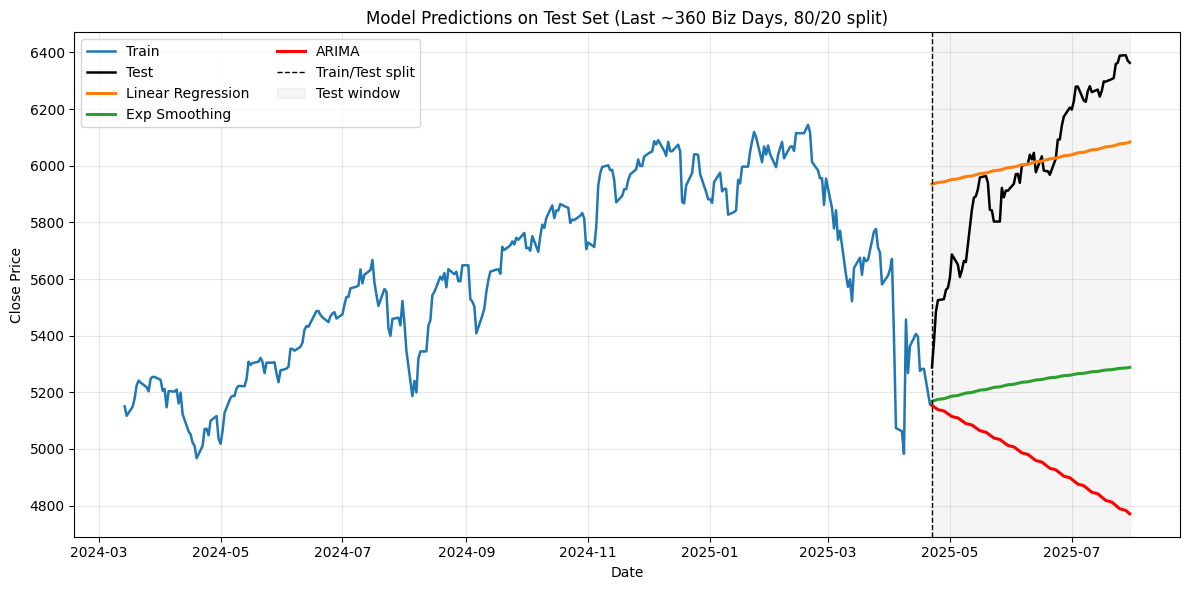

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

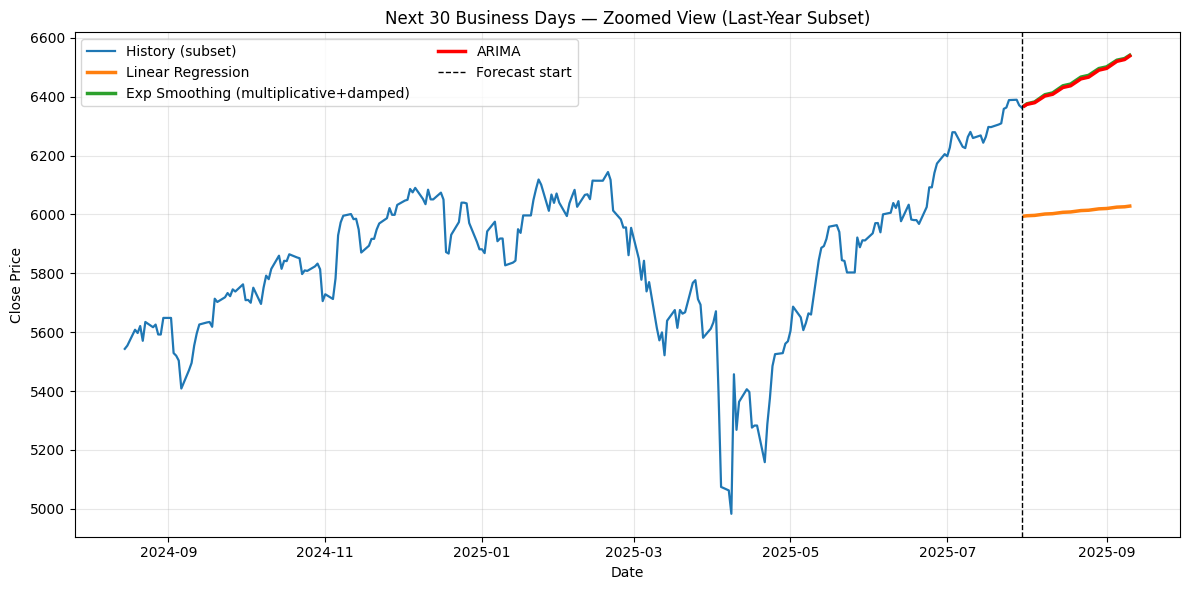

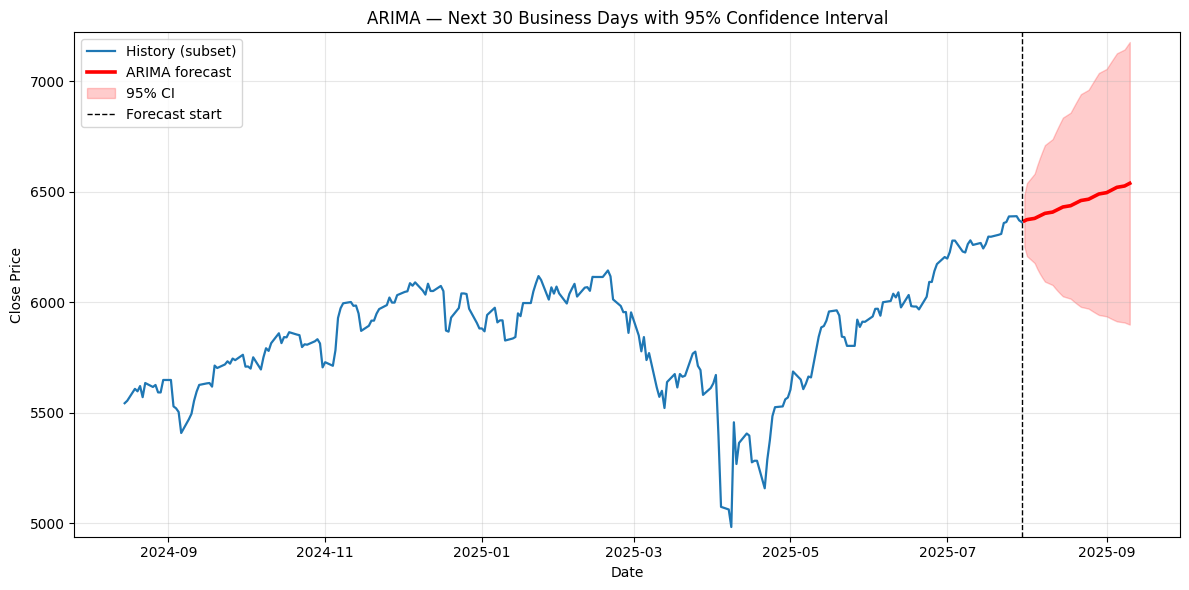

            LinearRegression_Forecast  ExpSmoothing_Forecast  ARIMA_Forecast  \
2025-07-31                5994.457027            6369.757550     6368.531343   
2025-08-01                5995.624566            6376.004255     6374.178426   
2025-08-04                5996.792333            6382.225806     6379.841153   
2025-08-05                5997.960327            6388.422275     6385.519522   
2025-08-06                5999.128548            6394.593733     6391.213534   
2025-08-07                6000.296997            6400.740251     6396.923189   
2025-08-08                6001.465674            6406.861899     6402.648487   
2025-08-11                6002.634578            6412.958751     6408.389428   
2025-08-12                6003.803709            6419.030876     6414.146012   
2025-08-13                6004.973069            6425.078348     6419.918239   
2025-08-14                6006.142656            6431.101236     6425.706108   
2025-08-15                6007.312471   

In [45]:
#All working
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima

# ==========================
# 0) Data prep (expects sp500df with DatetimeIndex + 'Close')
# ==========================
y = sp500df['Close'].asfreq('B').ffill()

# ==========================
# 1) Last ~360 business days, then 80/20 split
# ==========================
last_n = 360
y_recent = y.tail(last_n)

split_idx = int(len(y_recent) * 0.8)  # 80%
train = y_recent.iloc[:split_idx]
test  = y_recent.iloc[split_idx:]
split_date = test.index[0]

print(f"Train: {train.index[0].date()} → {train.index[-1].date()}  ({len(train)} pts)")
print(f"Test : {test.index[0].date()} → {test.index[-1].date()}   ({len(test)} pts)")

# ==========================
# 2) Fit on TRAIN -> predict TEST
# ==========================

# ---- Linear Regression (log + recent window inside TRAIN) ----
recent_n_lr = min(250, len(train))  # ~1Y of trading days
y_recent_train = train.tail(recent_n_lr)
X_train_lr = np.arange(len(y_recent_train)).reshape(-1, 1)
X_test_lr  = np.arange(len(y_recent_train), len(y_recent_train) + len(test)).reshape(-1, 1)

lr = LinearRegression().fit(X_train_lr, np.log(y_recent_train))
lin_pred = pd.Series(np.exp(lr.predict(X_test_lr)), index=test.index)

# ---- Exponential Smoothing (damped; choose add vs mult by validation) ----
es_add = ExponentialSmoothing(train, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
es_mul = ExponentialSmoothing(train, trend='mul', damped_trend=True, seasonal=None).fit(optimized=True)

es_add_pred = pd.Series(es_add.forecast(len(test)).values, index=test.index)
es_mul_pred = pd.Series(es_mul.forecast(len(test)).values, index=test.index)

# pick the better one on MAE (you can use RMSE if you prefer)
mae_add = mean_absolute_error(test, es_add_pred)
mae_mul = mean_absolute_error(test, es_mul_pred)
if mae_add <= mae_mul:
    es_fit = es_add
    es_pred = es_add_pred
    es_choice = "additive+damped"
else:
    es_fit = es_mul
    es_pred = es_mul_pred
    es_choice = "multiplicative+damped"
print(f"ES choice on validation: {es_choice}")

# ---- ARIMA (allow drift/time-trend, cap differencing, try monthly seasonality) ----
arima_model = auto_arima(
    train,
    seasonal=True, m=21,          # try short seasonality; set to False if you want no seasonality
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    max_d=1,                      # avoid overdifferencing (flat forecasts)
    trend='t',                    # time-trend (drift)
    information_criterion='aic'
)
arima_pred = pd.Series(arima_model.predict(n_periods=len(test)), index=test.index)

# ==========================
# 3) Evaluation on TEST
# ==========================
def evaluate(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {np.sqrt(mse):.2f}")

evaluate(test, lin_pred, "Linear Regression (log+recent)")
evaluate(test, es_pred,  f"Exponential Smoothing ({es_choice})")
evaluate(test, arima_pred, "ARIMA (drift, m=21, max_d=1)")

# --- Clear train/test plot with predictions ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', linewidth=1.8)
plt.plot(test.index, test, label='Test', linewidth=1.8, color='black')

plt.plot(lin_pred.index, lin_pred, label='Linear Regression', linewidth=2.2)
plt.plot(es_pred.index, es_pred, label='Exp Smoothing', linewidth=2.2)
plt.plot(arima_pred.index, arima_pred, label='ARIMA', linewidth=2.2, color='red')

plt.axvline(split_date, linestyle='--', color='k', linewidth=1, label='Train/Test split')
plt.axvspan(split_date, test.index[-1], color='grey', alpha=0.08, label='Test window')

plt.title('Model Predictions on Test Set (Last ~360 Biz Days, 80/20 split)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, ncol=2)
plt.tight_layout()
plt.show()

# ==========================
# 4) Refit on FULL last-year subset -> forecast next 30 biz days
# ==========================
forecast_horizon = 30
future_idx = pd.date_range(y_recent.index[-1] + pd.tseries.offsets.BDay(),
                           periods=forecast_horizon, freq='B')

# Linear Regression forecast (log + recent window)
y_recent_full = y_recent.tail(recent_n_lr)
X_full_lr   = np.arange(len(y_recent_full)).reshape(-1, 1)
X_future_lr = np.arange(len(y_recent_full), len(y_recent_full) + forecast_horizon).reshape(-1, 1)
lr = LinearRegression().fit(X_full_lr, np.log(y_recent_full))
lin_fc = pd.Series(np.exp(lr.predict(X_future_lr)), index=future_idx)

# Exponential Smoothing forecast (use the chosen type but refit on full subset)
if es_choice.startswith("add"):
    es_full_fit = ExponentialSmoothing(y_recent, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
else:
    es_full_fit = ExponentialSmoothing(y_recent, trend='mul', damped_trend=True, seasonal=None).fit(optimized=True)
es_fc = pd.Series(es_full_fit.forecast(steps=forecast_horizon).values, index=future_idx)

# ARIMA forecast + 95% CIs (same constraints; refit on full subset)
arima_full_model = auto_arima(
    y_recent,
    seasonal=True, m=21,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    max_d=1,
    trend='t',
    information_criterion='aic'
)
arima_mean, arima_ci = arima_full_model.predict(
    n_periods=forecast_horizon, return_conf_int=True, alpha=0.05
)
arima_fc    = pd.Series(arima_mean, index=future_idx)
arima_lower = pd.Series(arima_ci[:, 0], index=future_idx)
arima_upper = pd.Series(arima_ci[:, 1], index=future_idx)

# ==========================
# 5) Plots
# ==========================

# (A) Optional combined zoomed forecast for context
hist_tail = y_recent.tail(250)
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(lin_fc.index, lin_fc, label='Linear Regression', linewidth=2.5)
plt.plot(es_fc.index, es_fc, label=f'Exp Smoothing ({es_choice})', linewidth=2.5)
plt.plot(arima_fc.index, arima_fc, label='ARIMA', linewidth=2.5, color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')
plt.title('Next 30 Business Days — Zoomed View (Last-Year Subset)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()

# (B) ARIMA-only with 95% confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(arima_fc.index, arima_fc, label='ARIMA forecast', linewidth=2.6, color='red')
plt.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.2, label='95% CI', color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

ymin = pd.concat([hist_tail, arima_lower, arima_upper]).min()
ymax = pd.concat([hist_tail, arima_lower, arima_upper]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('ARIMA — Next 30 Business Days with 95% Confidence Interval')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

# ==========================
# 6) Forecast table
# ==========================
forecast_df = pd.DataFrame({
    'LinearRegression_Forecast': lin_fc,
    'ExpSmoothing_Forecast': es_fc,
    'ARIMA_Forecast': arima_fc,
    'ARIMA_Lower95': arima_lower,
    'ARIMA_Upper95': arima_upper
})
print(forecast_df)


In [19]:
# Drop NA and select correct columns
clean_data = data[[('Close', '^GSPC'), ('dummy_var', '')]].dropna()
#clean_data
corr = clean_data[('Close', '^GSPC')].corr(clean_data[('dummy_var', '')])
corr


np.float64(0.06120669127518778)

In [20]:
data.isnull().sum()

Price      Ticker
Close      ^GSPC     0
High       ^GSPC     0
Low        ^GSPC     0
Open       ^GSPC     0
Volume     ^GSPC     0
dummy_var            0
dtype: int64

<Axes: xlabel='Date'>

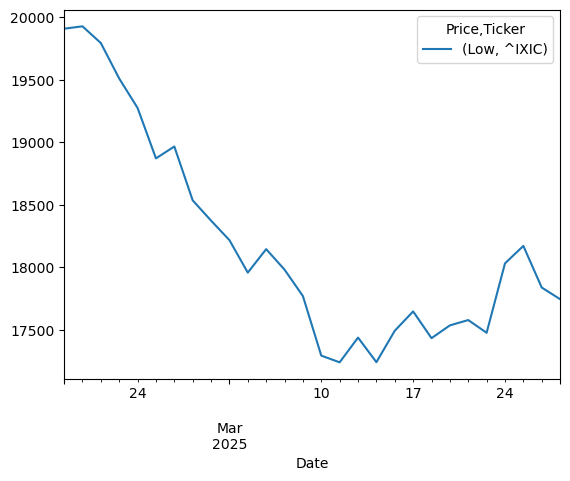

In [28]:
data[['Low']].plot()

In [ ]:
start = datetime(2025, 2, 17)
end = datetime(2025, 3, 11)

# Fetch data using yfinance
data = yf.download('AAPL', start=start, end=end)
data

In [27]:
start = datetime(2025, 2, 17)
end = datetime(2025, 3, 28)

# Fetch data using yfinance
data = yf.download('^IXIC', start=start, end=end)
data.head()

C:\Users\Dijon\AppData\Local\Temp\ipykernel_3604\1527995119.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^IXIC', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
2025-02-18,20041.259766,20110.119141,19909.740234,20090.550781,8683170000
2025-02-19,20056.250000,20099.390625,19928.890625,19994.500000,8171530000
2025-02-20,19962.359375,20041.150391,19795.019531,20029.189453,7329270000
2025-02-21,19524.009766,20016.660156,19510.910156,20006.689453,8461020000
2025-02-24,19286.929688,19644.230469,19275.460938,19590.849609,7414760000


In [ ]:
#self._set_session(session or requests.Session(impersonate="chrome"))

In [23]:
  #from curl_cffi import requests
  #session = requests.Session(impersonate="chrome")
  #ticker = yf.Ticker('^IXIC', session=session)

In [ ]:
Първо емпиричната част
с 0 и 1 - регресионен модел(като фактор), може да се добави и обема като фактор

1.Информация за индексите /Сваляне на данните
Уточнаване на събития
2. Информация за анализите или политически събития; почистване. спад, скок
    Подготовка на данните, графики, описания на динамиката; процент на прираст
    Трениране на модел
3. Метода с който правя нещо, 
4. поне 9 месеца
